In [1]:
import sys
sys.path.append('/Users/benj/Documents/SpEC-class')
import SEC_Class as sp
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cmcrameri.cm as cmc
from scipy import signal


In [2]:
# get the path for the bentham light source
AndorPath = sp.select_file_path()
CV_path = sp.select_file_path()

print(AndorPath, "\n", CV_path)     

/Users/benj/Documents/IrBenchmark/10 mVs-1/ANDORSPEC-0.0.0.0__0.pkl 
 /Users/benj/Documents/IrBenchmark/10 mVs-1/CV-3.3.0.0__0.csv


2
Fitted parameters saved to the interpolation attribute are:
        Amplitude:0.3501621398377465
        Period:1399.9992762833133
        Phase: 0.00044236935224576014 
        Offset: 0.7911801074751459
        by passing (time_array, fitted parametes) you can interpolate t-->V
        NOTE this function is only as accurate as the CV's sampling rate
        by rounding the values to the parameters used you will get the best result 
        


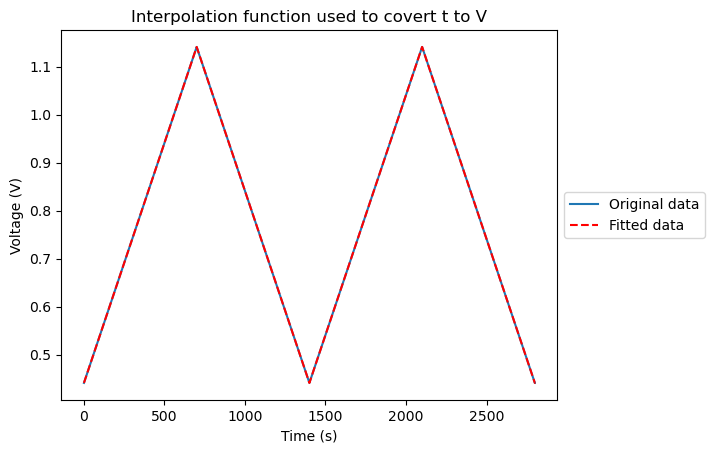

{0: {'Anodic':              t_s     Ewe_V       I_A
  0       0.100000  0.441011 -0.001328
  1       0.200000  0.441108 -0.001046
  2       0.300000  0.441205 -0.000826
  3       0.400000  0.441306 -0.000654
  4       0.500000  0.441409 -0.000518
  ...          ...       ...       ...
  6996  699.700012  1.140969  0.000564
  6997  699.799988  1.141075  0.000566
  6998  699.900024  1.141177  0.000567
  6999  700.000000  1.141270  0.000569
  7000  700.100037  1.141364  0.000570
  
  [7001 rows x 3 columns],
  'Cathodic':                t_s     Ewe_V       I_A
  7001    700.200012  1.141273  0.000568
  7002    700.299988  1.141164  0.000564
  7003    700.400024  1.141061  0.000562
  7004    700.500000  1.140978  0.000560
  7005    700.600037  1.140881  0.000557
  ...            ...       ...       ...
  13996  1399.700073  0.441408 -0.000021
  13997  1399.800049  0.441309 -0.000022
  13998  1399.900024  0.441209 -0.000022
  13999  1400.000000  0.441119 -0.000021
  14000  1400.099976  0.44

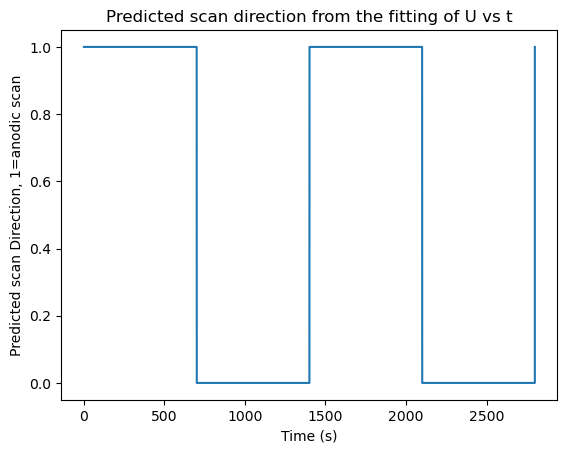

In [3]:
# get in the first spectral object which is for the bentham light source
SpEC1 = sp.SpEC()
SpEC1.read_CV(CV_path)
SpEC1.generate_interpolation_function()
SpEC1.read_Andorspec(AndorPath)
SpEC1.Calibrate_Andorspec()
SpEC1.populate_spec_scans()
SpEC1.populate_CV_scans()


In [4]:
SpEC1.Downsample_spec_scans(0.001, 1)

{0: {'Anodic': Voltage (V)             0.441         0.442         0.443         0.444  \
  Wavelength (nm)                                                           
  400              3.308359e+06  3.346196e+06  3.360824e+06  3.362852e+06   
  401              3.294508e+06  3.332414e+06  3.346524e+06  3.347960e+06   
  402              3.469353e+06  3.509547e+06  3.524002e+06  3.525537e+06   
  403              3.629077e+06  3.670353e+06  3.685766e+06  3.686257e+06   
  404              3.831406e+06  3.874566e+06  3.891410e+06  3.892183e+06   
  ...                       ...           ...           ...           ...   
  938              3.011183e+06  3.041738e+06  3.054251e+06  3.055351e+06   
  939              2.989637e+06  3.022542e+06  3.035635e+06  3.036721e+06   
  940              2.942867e+06  2.973714e+06  2.986833e+06  2.987201e+06   
  941              2.880257e+06  2.909920e+06  2.922021e+06  2.922473e+06   
  942              2.782390e+06  2.812810e+06  2.824662e+06  2.

(7001, 2)


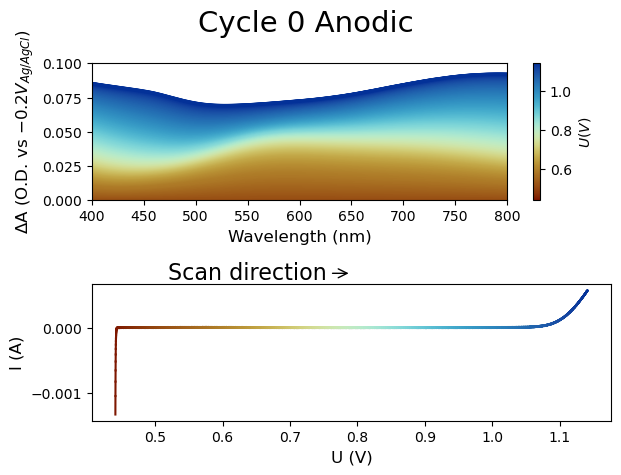

(7000, 2)


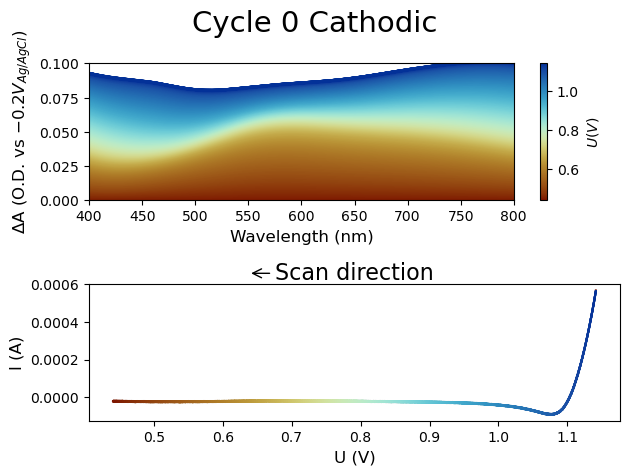

(7000, 2)


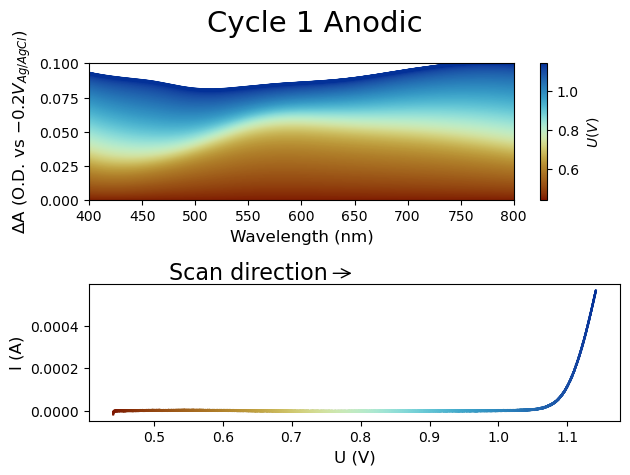

(7000, 2)


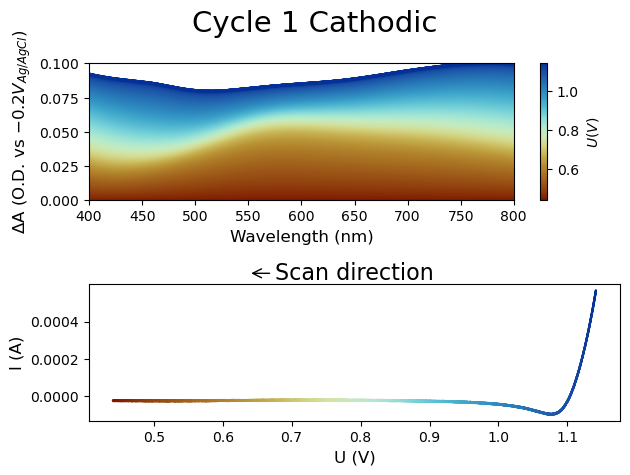

In [5]:
output_dir = 'Plots'
full_output_path = os.path.join(AndorPath.parent, output_dir)
os.makedirs(full_output_path, exist_ok=True)

for key, value in SpEC1.CV_scans.items():

        for key2, value2 in value.items():
            CV=SpEC1.CV_scans[key][key2]
            if key2 == 'Anodic':
                test, ref =sp.calculateDOD(SpEC1, key, key2, -0.2, 101)
                sp.Co_plot_DOD_and_CV(test,
                                      CV,
                                        Title=f'Cycle {key} {key2}',
                                          y_max=0.1, y_min=-0.0,
                                            x_min=400, x_max=800,
                                              reference_potential=f"$ {ref}V_{{Ag/AgCl}}$",
                                                scan_direction=key2,
                                                  cmap_option=cmc.roma)
            elif key2 == 'Cathodic':
                test, ref =sp.calculateDOD(SpEC1, key, key2, -0.2, 101)
                sp.Co_plot_DOD_and_CV(test,
                                      CV,
                                        Title=f'Cycle {key} {key2}',
                                          y_max=0.1, y_min=-0.,
                                            x_min=400, x_max=800,
                                              reference_potential=f"$ {ref}V_{{Ag/AgCl}}$",
                                                scan_direction=key2,
                                                  cmap_option=cmc.roma)
            #plt.savefig(os.path.join(full_output_path, f'Cycle_{key}_{key2}.png'))
            plt.close() 

(543, 701)

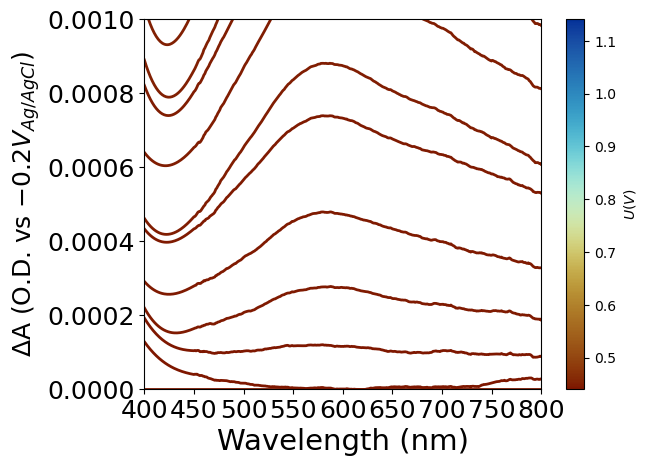

In [6]:
data, ref=sp.calculateDOD(SpEC1, 1, 'Anodic', -0.2, 101)
sp.plot_DOD(data, y_max=0.001, y_min=-0, x_min=400, x_max=800, reference_potential=f"$ {ref}V_{{Ag/AgCl}}$")
data.shape

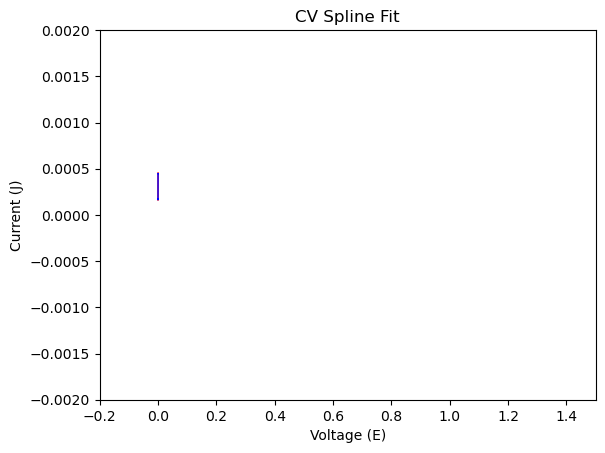

array(0.00016945)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

# Extract current and voltage data from the DataFrame
J = test.iloc[:, 2]
E = test.iloc[:, 1]

# Sort the data by voltage
sorted_indices = np.argsort(E)
E_sorted = E.iloc[sorted_indices]
J_sorted = J.iloc[sorted_indices]

# Fit the CV to a spline function
spl = UnivariateSpline(E_sorted, J_sorted)
spl.set_smoothing_factor(0.000001)

# Plot the spline function
plt.plot(E_sorted, spl(E_sorted), 'r', lw=1)

# Plot the original data
plt.plot(E_sorted, J_sorted, 'b', lw=1) 
plt.xlabel('Voltage (E)')
plt.ylabel('Current (J)')
plt.title('CV Spline Fit')
# set the x range from -0.2 to 1.5
plt.xlim(-0.2, 1.5)

# set the y range from -0.002 to 0.002
plt.ylim(-0.002, 0.002)

plt.show()

# use the spline function to calculate the current at a specific voltage
spl(0.)





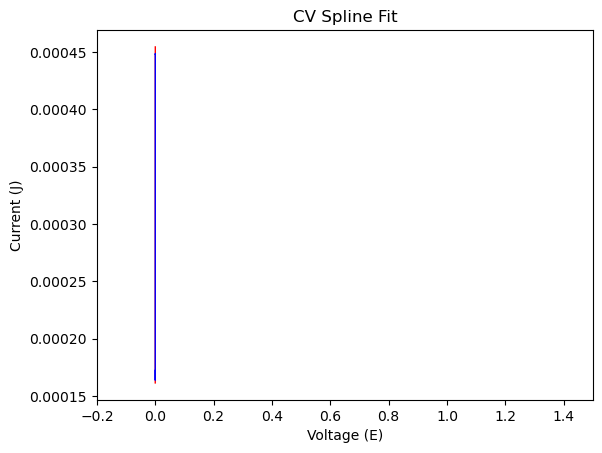

In [9]:
sp.fit_current_to_univariate_spline(J=J,U=E, smoothing_factor=0.000001)

,0.441,0.451,0.461,0.471,0.481,0.491,0.501,0.511,0.521,0.531,...,1.041,1.051,1.061,1.071,1.081,1.091,1.101,1.111,1.121,1.131
Wavelength (nm),,,,,,,,,,,,,,,,,,,,,
400,NaN,1.073403,0.501571,0.548825,0.518273,0.466906,0.603923,0.513605,0.521207,0.547004,...,0.868160,0.818392,0.852267,0.750864,0.796129,0.755462,0.687156,0.729418,0.624863,0.745291
401,NaN,1.065982,0.498009,0.545917,0.514049,0.464701,0.599217,0.510489,0.517110,0.541329,...,0.870320,0.822814,0.854117,0.756539,0.797501,0.759370,0.692893,0.731894,0.630818,0.744957
402,NaN,1.058990,0.494680,0.543188,0.510055,0.462662,0.594715,0.507550,0.513216,0.535910,...,0.872574,0.827254,0.856088,0.762237,0.799071,0.763373,0.698696,0.734555,0.636876,0.744928
403,NaN,1.052422,0.491579,0.540635,0.506288,0.460786,0.590414,0.504787,0.509522,0.530744,...,0.874918,0.831707,0.858173,0.767952,0.800832,0.767466,0.704562,0.737394,0.643032,0.745197
404,NaN,1.046271,0.488704,0.538256,0.502745,0.459073,0.586313,0.502197,0.506025,0.525828,...,0.877347,0.836171,0.860368,0.773682,0.802776,0.771645,0.710486,0.740406,0.649281,0.745756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,NaN,1.014925,0.530725,0.531010,0.485016,0.463985,0.544756,0.481895,0.464201,0.459245,...,0.924738,0.895153,0.874366,0.854796,0.844768,0.825943,0.779553,0.807220,0.824531,0.744359
939,NaN,1.013267,0.530087,0.528652,0.482921,0.464319,0.543906,0.480328,0.463615,0.456430,...,0.925702,0.894034,0.875996,0.859462,0.845000,0.827849,0.780806,0.809281,0.831788,0.747818
940,NaN,1.011574,0.529445,0.526227,0.480713,0.464707,0.543038,0.478691,0.463023,0.453560,...,0.926740,0.892899,0.877752,0.864415,0.845282,0.829947,0.782160,0.811446,0.839356,0.751489


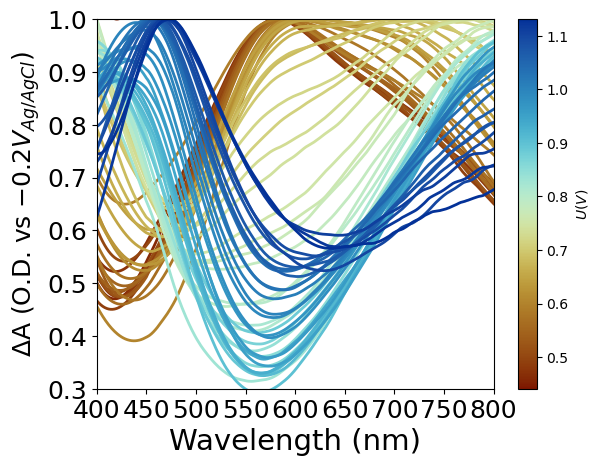

In [8]:
data=sp.calculateDOD(SpEC1, 0, 'Anodic', -0.2, 21)[0]
data_diff=sp.calculate_differential_spectra(DOD_dataframe=data, voltage_step=0.01, smooth_strength=101, Normalise=True)


sp.plot_DOD(data_diff, y_max=1, y_min=0.3, x_min=400, x_max=800, reference_potential=f"$ {ref}V_{{Ag/AgCl}}$")

data_diff